Nicole Reitz  
General Assembly  
DAT_BOS_07  
25 January 2015


# Predicting Airbnb New User Bookings


## Problem
Airbnb is a website that connects people to list and rent short-term lodging. User listings include 1.5 million homes in 34,000 cities and 190 countries. Visitors to the Airbnb website are met with eye-catching photos of destinations near and far, inspiring both wanderlust and a sense of global community. Once a user spends time on the site, registers an account, or books a stay, the company has valuable data with which to recommend future accomodations and drive customer engagement. But Airbnb's ability to predict and showcase desireable destinations to new site visitors is key to winning new customers and ensuring that the travel bug bites!

This project's challenge is to predict the country in which a new Airbnb user will make her first booking. All data was provided by Airbnb via Kaggle in a competition running from November 2015 to February 2016. My goal is to identify a classification model that successfully predicts a new user's booking destination, through exploration of the features provided and the machine learning techniques covered in General Assembly's Data Science course.

Here's a link to the Kaggle competition page: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings


## Data
I chose to focus on the main training set provided by Airbnb for this competition. With information dating back to 2010, the dataset contained the following variables for 213,451 users in the United States:

- Gender
- Age
- Signup method
- Date account created
- Timestamp of first activity
- Date of first booking
- Page viewed before signup
- Language preference
- Paid marketing type
- Marketing provider
- First marketing encountered
- Signup app
- Device type
- Browser
- Destination country (target variable for prediction)

The destination country target variable contained 12 values: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no booking at all), and 'other.' Airbnb was clear to point out that "NDF" indicated that the user did not book at all, and that "other" indicated a booking in a country not listed here.

In my initial exploration of the data, I found that information was sparse and in many cases lacked variation. Fifty-eight percent of the users did not book a stay at all and 30% booked in US; the remaining 12% were split across 10 destination values. I thought that language preference might be a useful predictor, but 97% of users visited the English version of the site. Basic demographics, so often the foundation of customer analysis, were also missing a lot of data. Forty-five percent of users were of unidentified gender. Forty-one percent were of unidentified age, and many of the age values--ranging from 1 to 2016!--were not to be trusted. 


## Approach
I found myself with many features to choose from, but no sense of their value. I decided to start with a decision tree classifier and let the algorithm identify the features of greatest importance; the categorical values and supervised dataset made this an appealing option. I also thought principal component analysis would be helpful in reducing what I saw would become an overwhelmingly large feature space after data cleaning.

I began by checking each variable for missing values and recoding categorical NaNs into "None" values. I cleaned out the age variable, leaving only users ages 18-98 (one must be 18 to book on Airbnb) and recoded missing age values to the median, 34. I regrouped low-incidence language values into an "other" category, but kept languages corresponding to the target country destinations. Considering the effects of seasonality on travel, I converted timestamped features to datetime objects and extracted the month values only. Finally, I converted all categorical features to numeric components using get_dummies, dropping one column from each dummy data frame to reduce redundancy in the data.

My first attempt at a decision tree classifier included only the age, gender, and language variables and yielded only 70% correct predictions. After completing the data cleaning steps described above, I re-ran the decision tree classifier with almost all features (149 after get_dummies!) included as options. After some experimentation with max_depth, I was able to improve the model to 87% accuracy (using scikit-learn cross-validation to evaluate my work). I then experimented with boosted decision trees, random forests, and extra trees classifiers. None performed quite as well as my first decision tree model, though boosted trees and random forests came close.

Extending my data exploration to other classifiers required reduction in the feature space. My attempts to extract the best estimators using GridSearch were computationally taxing and failed. So I performed a principal component analysis; reducing the feature space to seven components allowed me to successfully run a k-nearest neighbors classifier. Reducing the feature space did not change the result of the decision tree classifier--given that the most successful tree depth was still within the number of features in the new space, that makes sense. The post-PCA KNN model was about as successful (85%) as boosted trees before and after PCA. Random forests and extra tree classifiers did not perform as well on the PCA-transformed data.

The most important features emerging from the decision tree model were: month of first booking, signup channel (web/app), and marketing provider. It's interesting that these were more important to prediction than age, gender, or even language (though Dutch did emerge above other langauges in importance--I'm glad I kept it in!). As a market researcher, I see basic demographics driving customer analysis day in and day out. It's fascinating to me that, in this case and likely many others, the most telling factors in predicting consumer behavior could be so hidden from plain sight.


## Challenges, Successes, and Next Steps
I did browse another Kaggle entry or two to see how others approached the initial data exploration, but I committed to doing the work below on my own. It's not perfect, but it was deeply rewarding. And now that I have some data science under my belt, I can see how I'd like to improve it.

First, I'd like to go back and rework some of my features. For example, age could be regrouped into 5- or 10-year buckets and the date variables could be regrouped into seasons to simplify and reduce the number of features. Airbnb also provided a whole other set of web session data that I didn't even touch--that could be merged with the user data for added insight. I'd like to try some other classifiers (logistic regression, support vector machines) and create better visualizations of the data and results. I'd also like to apply other algoriths to the important features identified by my decision tree classifier and see how they perform. I'd like to get GridSearch to work, at least on smaller subsets of my feature space. And there is one timestamped variable that gave me some trouble--with more time I would explore what's going on there.

That said, predicting outcomes with 87% accuracy feels like success to me! The next step is to run my most successful predictive model on the unlabeled test data set provided by Airbnb and actually generate predictions for competition.

The steps outlined in this project could be applied to any business looking to win over new customers with a customized experience from the start. The best classification algorithm may change from dataset to dataset, but the business problem is essentially universal.


## Conclusions and Key Learnings
As a true Python and data science beginner, I was surprised and delighted by each small success in this process. And the longer I stuck with it, the challenges started to feel more like challenges and less like utter defeat. At one point, I had the idea to retrieve my feature column list by converting the data frame column value array to a list and removing my target value. That's when I really started to believe in my own ability. 

Yes, I have a lot to learn. And this project taught me that applying the data science process to real-world problems is the very best way to do so. My most valuable takeaways are the knowledge that I enjoy data science and the desire to continue practicing.

Thank you!

In [1]:
# DATA SCIENCE WORKFLOW - FOR REFERENCE.

# 1. SPLIT DATA INTO CATEGORICAL AND NUMERIC DATA
# 2. FILL NUMERIC NANS THROUGH IMPUTATION
# 3. FILL CATEGORICAL NANS WITH 'NOTHING'
# 4. DETECT LOW-FREQUENCY LEVELS IN CATEGORICAL FEATURES AND BIN THEM UNDER 'OTHER'
# 5. ENCODE EACH CATEGORICAL VARIABLE INTO A SEQUENCE OF BINARY VARIABLES
# 6. MERGE YOUR ENCODED CATEGORICAL DATA WITH YOUR NUMERIC DATA
# 7. REMOVE FEATURES WITH NO VARIATION
# 8. REMOVE PERFECTLY-CORELATED FEATURES
# 9. SCALE YOUR DATA WITH ZERO MEAN AND UNIT VARIANCE
# 10. PERFORM GRID SEARCH AND RFE ON YOUR DATA TO FIND THE OPTIMAL ESTIMATOR FOR YOUR DATA
# 11. TRAIN AND TEST YOUR MODEL ON THE DATA
# 12. RECLEAN, SCALE AND AND ENCODE INCOMING UNLABELED DATA USING SAME STEPS, SCALERS, ETC.
# 13. INPUT YOUR SCALED, CLEANED ENCODED INCOMING DATA INTO YOUR MODEL

In [2]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.svm import SVC
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import classification_report

%matplotlib inline

In [3]:
# Import Airbnb user data.
df = pd.read_csv('C:\\Users\\nreitz\\GAdata\\Airbnb\\train_users_2.csv')
df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
# Take a look at the series in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [5]:
# Take a look at the values in each series.
for col in df:
    print col,':', df[col].unique()

id : ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ..., '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
date_account_created : ['2010-06-28' '2011-05-25' '2010-09-28' ..., '2014-06-27' '2014-06-29'
 '2014-06-30']
timestamp_first_active : [20090319043255 20090523174809 20090609231247 ..., 20140630235754
 20140630235822 20140630235824]
date_first_booking : [nan '2010-08-02' '2012-09-08' ..., '2015-06-25' '2015-06-29' '2015-06-28']
gender : ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
age : [             nan   3.80000000e+01   5.60000000e+01   4.20000000e+01
   4.10000000e+01   4.60000000e+01   4.70000000e+01   5.00000000e+01
   3.60000000e+01   3.70000000e+01   3.30000000e+01   3.10000000e+01
   2.90000000e+01   3.00000000e+01   4.00000000e+01   2.60000000e+01
   3.20000000e+01   3.50000000e+01   5.90000000e+01   4.90000000e+01
   4.40000000e+01   3.40000000e+01   2.80000000e+01   1.90000000e+01
   5.30000000e+01   5.20000000e+01   3.90000000e+01   5.70000000e+01
   2.50000000e+01   5.40000000e+01   6.90000

In [6]:
""" Note from Airbnb: There are 12 possible outcomes of the destination country...
'NDF' is different from 'other' because 'other' means there was a booking, but
is to a country not included in the list, while 'NDF' means there wasn't a booking."""

# Replace 'NDF' with 'NO BOOKING' to make this clear in the dataframe. Clean up 'OTHER' too.
df.country_destination.replace('NDF', 'NO BOOKING', inplace=True)
df.country_destination.replace('other', 'OTHER', inplace=True)
df.country_destination.unique()

array(['NO BOOKING', 'US', 'OTHER', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT',
       'NL', 'DE', 'AU'], dtype=object)

NO BOOKING    58.347349
US            29.222632
OTHER          4.728954
FR             2.353233
IT             1.328174
GB             1.088774
ES             1.053638
CA             0.669006
DE             0.497070
NL             0.356991
AU             0.252517
PT             0.101663
Name: country_destination, dtype: float64


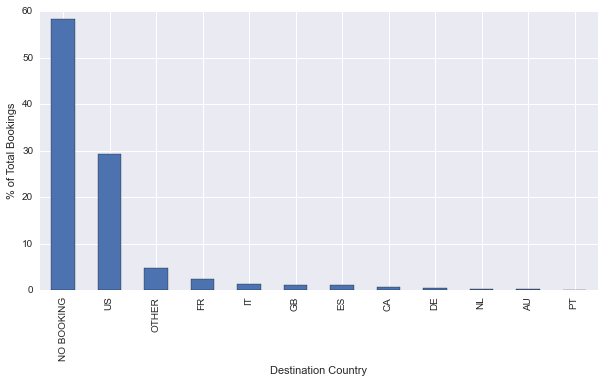

In [7]:
# Explore % bookings by country.
destination_percentage = df.country_destination.value_counts() / df.shape[0] * 100
destination_percentage.plot(kind='bar', figsize = (10,5))
plt.xlabel('Destination Country')
plt.ylabel('% of Total Bookings')

print destination_percentage

# Note that more than half of first-time users did not book a trip at all.

In [8]:
# Replace '-unknown-' and 'OTHER' gender with 'UNKNOWN' to simplify data.
df.gender.replace('-unknown-', 'UNKNOWN', inplace=True)
df.gender.replace('OTHER', 'UNKNOWN', inplace=True)
df.gender.unique()

array(['UNKNOWN', 'MALE', 'FEMALE'], dtype=object)

UNKNOWN    44.961139
FEMALE     29.534179
MALE       25.504683
Name: gender, dtype: float64


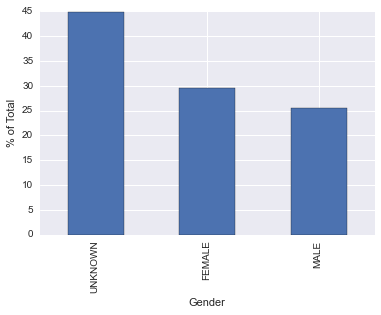

In [9]:
# Explore user demos, starting with gender.
gender_percentage = df.gender.value_counts() / df.shape[0] * 100
gender_percentage.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('% of Total')

print gender_percentage

# Nearly half of users are missing gender data.

In [10]:
# Check out user age.
df.age.describe()

# Note that there are clearly users with invalid age data--range goes from 1-2014!

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [11]:
# Recode anyone under 18 or 99+ to NaN (you must be 18+ to book on Airbnb).
for age in df.age:
    if age < 18 or age > 98:
        df.age.replace([age], np.nan, inplace=True)
        
df.age.describe()

count    122915.000000
mean         36.553570
std          11.623755
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          98.000000
Name: age, dtype: float64

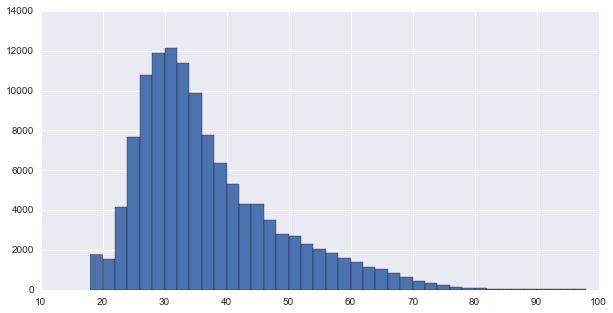

In [12]:
# Plot age - looks like average user is around 30, which makes sense.
df.age.hist(bins = 40, figsize = (10,5))

In [13]:
# Identify mean/median age.
mean_age = df.age.mean(skipna=True)
median_age = df.age.median(skipna=True)

print mean_age, median_age

36.5535695399 34.0


In [14]:
"""Fill missing age values with median age. I decided to create a 
new column for this in case I wanted to come back later and regroup original 
age into categorical buckets with a 'None' category.""" 

df['age_fillna'] = df.age.fillna(value=34)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 17 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        122915 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
age_fillna                 213451 non-null float64
dtypes: float64(2), int64(2), object(13)

In [15]:
# Check out language used on site--this may be a useful parameter.
# See language list at https://www.loc.gov/standards/iso639-2/php/code_list.php for reference

df.language.value_counts()

# Top languages used: English, Chinese, French, Spanish, Korean, German, Italian, Russian, Portuguese, Japanese, Swedish, Dutch

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

en       96.656375
zh        0.764578
fr        0.549072
es        0.428670
ko        0.349963
de        0.342936
it        0.240805
ru        0.182243
other     0.164909
pt        0.112438
ja        0.105411
sv        0.057156
nl        0.045444
Name: language, dtype: float64


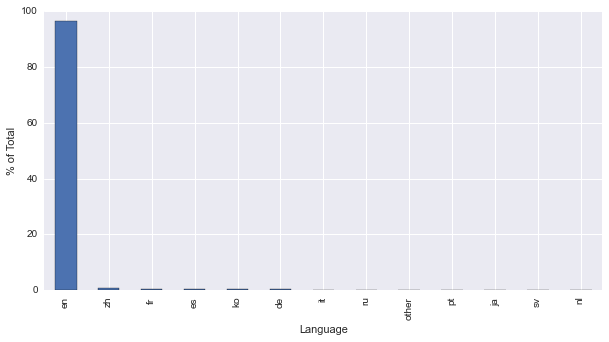

In [16]:
# Recode low-incidence languages into 'Other'.
# Note that Dutch is small, but I kept it because NL is one of the countries in which we want to predict bookings.
top_languages = ['en','zh','fr','es','ko','de','it','ru','pt','ja','sv', 'nl']
for lang in df.language:
    if lang not in top_languages:
        df.language.replace([lang], 'other', inplace=True)

# Calculate % of users for each language.        
language_percentage = df.language.value_counts() / df.shape[0] * 100
language_percentage.plot(kind='bar', figsize = (10,5))
plt.xlabel('Language')
plt.ylabel('% of Total')

print language_percentage

# Note that almost all users use the English version of the site.

In [17]:
"""Use 'to_datetime' function to convert date_account_created, date_first_booking, 
and timestamp_first_active to datetime format. I suspect that month might be a useful feature 
for exploring seasonality, so once converted I'll extract the month from each."""

date_account_created = pd.to_datetime(df['date_account_created'])
print date_account_created

0        2010-06-28
1        2011-05-25
2        2010-09-28
3        2011-12-05
4        2010-09-14
5        2010-01-01
6        2010-01-02
7        2010-01-03
8        2010-01-04
9        2010-01-04
10       2010-01-04
11       2010-01-05
12       2010-01-05
13       2010-01-05
14       2010-01-07
15       2010-01-07
16       2010-01-07
17       2010-01-07
18       2010-01-08
19       2010-01-10
20       2010-01-10
21       2010-01-10
22       2010-01-11
23       2010-01-11
24       2010-01-11
25       2010-01-12
26       2010-01-12
27       2010-01-12
28       2010-01-13
29       2010-01-13
            ...    
213421   2014-06-30
213422   2014-06-30
213423   2014-06-30
213424   2014-06-30
213425   2014-06-30
213426   2014-06-30
213427   2014-06-30
213428   2014-06-30
213429   2014-06-30
213430   2014-06-30
213431   2014-06-30
213432   2014-06-30
213433   2014-06-30
213434   2014-06-30
213435   2014-06-30
213436   2014-06-30
213437   2014-06-30
213438   2014-06-30
213439   2014-06-30


In [18]:
# Create a series for month in which account was created.
df['month_account_created'] = date_account_created.dt.month
print df.month_account_created


0          6
1          5
2          9
3         12
4          9
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
213421     6
213422     6
213423     6
213424     6
213425     6
213426     6
213427     6
213428     6
213429     6
213430     6
213431     6
213432     6
213433     6
213434     6
213435     6
213436     6
213437     6
213438     6
213439     6
213440     6
213441     6
213442     6
213443     6
213444     6
213445     6
213446     6
213447     6
213448     6
213449     6
213450     6
Name: month_account_created, dtype: int64


In [19]:
# Convert date_first_booking to datetime. As seen above, many users did not book at all.
date_first_booking = pd.to_datetime(df['date_first_booking'])
print date_first_booking

0               NaT
1               NaT
2        2010-08-02
3        2012-09-08
4        2010-02-18
5        2010-01-02
6        2010-01-05
7        2010-01-13
8        2010-07-29
9        2010-01-04
10       2010-01-06
11              NaT
12       2010-01-18
13              NaT
14              NaT
15       2010-01-08
16              NaT
17       2010-01-09
18              NaT
19       2010-01-10
20       2010-01-18
21       2010-01-11
22       2010-01-11
23              NaT
24              NaT
25       2010-01-15
26              NaT
27       2010-01-22
28       2010-01-13
29       2010-01-19
            ...    
213421          NaT
213422          NaT
213423          NaT
213424          NaT
213425          NaT
213426          NaT
213427          NaT
213428          NaT
213429          NaT
213430          NaT
213431          NaT
213432          NaT
213433          NaT
213434          NaT
213435          NaT
213436          NaT
213437          NaT
213438          NaT
213439   2015-03-16


In [20]:
# Create a series for month in which first booking was made and fill NAs.
df['month_first_booking'] = date_first_booking.dt.month
df.month_first_booking.replace('NaN', 'None', inplace=True)
print df.month_first_booking

0         None
1         None
2            8
3            9
4            2
5            1
6            1
7            1
8            7
9            1
10           1
11        None
12           1
13        None
14        None
15           1
16        None
17           1
18        None
19           1
20           1
21           1
22           1
23        None
24        None
25           1
26        None
27           1
28           1
29           1
          ... 
213421    None
213422    None
213423    None
213424    None
213425    None
213426    None
213427    None
213428    None
213429    None
213430    None
213431    None
213432    None
213433    None
213434    None
213435    None
213436    None
213437    None
213438    None
213439       3
213440    None
213441       8
213442    None
213443       7
213444    None
213445       7
213446    None
213447    None
213448    None
213449    None
213450    None
Name: month_first_booking, dtype: object


In [21]:
"""I had some trouble with the timestamp_first_active series. 
I decided to leave it out of my model for the time being.
Any idea what's going on here? If I run the code for any one entry, it works just fine
but somehow whole series just spits out 1970-01-01..."""

timestamp_first_active = pd.to_datetime(df['timestamp_first_active'])
print timestamp_first_active

0        1970-01-01 05:34:50.319043255
1        1970-01-01 05:34:50.523174809
2        1970-01-01 05:34:50.609231247
3        1970-01-01 05:34:51.031060129
4        1970-01-01 05:34:51.208061105
5        1970-01-01 05:35:00.101215619
6        1970-01-01 05:35:00.102012558
7        1970-01-01 05:35:00.103191905
8        1970-01-01 05:35:00.104004211
9        1970-01-01 05:35:00.104023758
10       1970-01-01 05:35:00.104194251
11       1970-01-01 05:35:00.105051812
12       1970-01-01 05:35:00.105060859
13       1970-01-01 05:35:00.105083259
14       1970-01-01 05:35:00.107055820
15       1970-01-01 05:35:00.107204555
16       1970-01-01 05:35:00.107215125
17       1970-01-01 05:35:00.107224625
18       1970-01-01 05:35:00.108015641
19       1970-01-01 05:35:00.110010817
20       1970-01-01 05:35:00.110152120
21       1970-01-01 05:35:00.110220941
22       1970-01-01 05:35:00.111031438
23       1970-01-01 05:35:00.111224015
24       1970-01-01 05:35:00.111230808
25       1970-01-01 05:35

In [22]:
# Just one more column with missing data to fill!
df.first_affiliate_tracked.fillna(value = 'no_info', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 19 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        122915 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    213451 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
age_fillna                 213451 non-null float64
month_account_created      213451 non-nu

In [23]:
# Lots of categorical data! Create dummy features for all of them, dropping one column per set of dummy features.

dummies_gender = pd.get_dummies(df.gender, prefix = 'gender').ix[:, 1:]
dummies_month_first_booking = pd.get_dummies(df.month_first_booking, prefix = 'month_fb').ix[:, 1:]
dummies_month_account_created = pd.get_dummies(df.month_account_created, prefix = 'month_ac').ix[:, 1:]
dummies_signup_method = pd.get_dummies(df.signup_method, prefix = 'signup_method').ix[:, 1:]
dummies_signup_flow = pd.get_dummies(df.signup_flow, prefix = 'signup_flow').ix[:, 1:]
dummies_language = pd.get_dummies(df.language, prefix = 'lang').ix[:, 1:]
dummies_affiliate_channel = pd.get_dummies(df.affiliate_channel, prefix = 'aff_chan').ix[:, 1:]
dummies_affiliate_provider = pd.get_dummies(df.affiliate_provider, prefix = 'aff_prov').ix[:, 1:]
dummies_first_affiliate_tracked = pd.get_dummies(df.first_affiliate_tracked, prefix = 'first_at').ix[:, 1:]
dummies_signup_app = pd.get_dummies(df.signup_app, prefix = 'signup_app').ix[:, 1:]
dummies_first_device_type = pd.get_dummies(df.first_device_type, prefix = 'dev_type').ix[:, 1:]
dummies_first_browser = pd.get_dummies(df.first_browser, prefix = 'browser').ix[:, 1:]


In [24]:
# Merge the feature I want to predict, age feature, and all dummies into a new data frame.

df2 = pd.concat([df.country_destination, df.age_fillna, dummies_gender, dummies_month_first_booking, dummies_month_account_created, 
    dummies_signup_method, dummies_signup_flow, dummies_language, dummies_affiliate_channel, dummies_affiliate_provider,
    dummies_first_affiliate_tracked, dummies_signup_app, dummies_first_device_type, dummies_first_browser], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Columns: 150 entries, country_destination to browser_wOSBrowser
dtypes: float64(149), object(1)
memory usage: 245.9+ MB


In [25]:
# Define X (features) and y (target variable) for modeling:
X = df2.ix[:, 1:]
y = df2.country_destination

# Train/Test Split!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [26]:
# BUILD A DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc.fit(X_train, y_train)

# Note that I tested a few options and had the most success with max_depth=4.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

In [27]:
# Check success of initial decision tree model.
cross_val_score(dtc, X, y)

array([ 0.87566405,  0.87568692,  0.87525651])

In [28]:
# Find out which features are the most important in tree model...but I have 150 to list out!
# Get df2 column list by converting column value array to list, removing 'country_destination'. 
# Then take a look at feature importance. 

feature_cols = np.array(df2.columns.values).tolist()
feature_cols.remove('country_destination')
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':dtc.feature_importances_})
feature_importance.sort_values(by = 'importance', ascending = False)

,feature,importance
14,month_fb_None,0.997933
58,aff_chan_other,0.000841
88,signup_app_Web,0.000635
61,aff_chan_sem-non-brand,0.000341
87,signup_app_Moweb,0.000102
64,aff_prov_craigslist,0.000071
50,lang_nl,0.000040
69,aff_prov_facebook-open-graph,0.000038
98,browser_AOL Explorer,0.000000
99,browser_Android Browser,0.000000


In [29]:
# Before paring down list of features, let's see how simple decision tree compares to some ensemble methods.
# Max features selected by square root of total # features.

# Decision Tree Classifier
clf1 = DecisionTreeClassifier(max_depth=4, min_samples_split=1,
       random_state=0)
clf1.fit(X_train, y_train)
scores = cross_val_score(clf1, X, y)
print "DecisionTreeClassifier:", scores.mean()

# Boosted Decision Tree
clf2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=1, max_features=12,
       random_state=0))
clf2.fit(X_train, y_train)
scores = cross_val_score(clf2, X, y)
print "AdaBoostClassifier:", scores.mean()

# Random Forest Classifier
clf3 = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=12,
     min_samples_split=1, random_state=0)
clf3.fit(X_train, y_train)
scores = cross_val_score(clf3, X, y)
print "RandomForestClassifier:", scores.mean()

# Extra Trees Classifier
clf4 = ExtraTreesClassifier(n_estimators=10, max_depth=4,  max_features=12,
    min_samples_split=1, random_state=0)
clf4.fit(X_train, y_train)
scores = cross_val_score(clf4, X, y)
print "ExtraTreesClassifier:  ", scores.mean()

DecisionTreeClassifier: 0.87553582892
AdaBoostClassifier: 0.863748859633
RandomForestClassifier: 0.85363381956
ExtraTreesClassifier:   0.750023258515


In [30]:
# Since I have so many features and a pretty sparse dataset, use PCA to identify and extract the most influential features.
# First, get organized.

n_samples, n_features = X.shape
target_names = df2.country_destination.unique()
n_classes = target_names.shape[0]

print "Sample size: ", n_samples
print "Features: ", n_features
print "Classes: ", n_classes
print "Target class names: ", target_names

Sample size:  213451
Features:  149
Classes:  12
Target class names:  ['NO BOOKING' 'US' 'OTHER' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


In [31]:
# Get centered.
X_centered = X - X.mean()

In [32]:
# Start by including all 149 features and see what happens.

# Create PCA-generator
pca = PCA(n_components = 149)

# Transform X_centered to X_pca via fit_transform
X_pca = pca.fit_transform(X_centered)

# Transform X_train to X_train_pca
X_train_pca = pca.transform(X_train)

# Transform X_test to X_test_pca
X_test_pca = pca.transform(X_test)

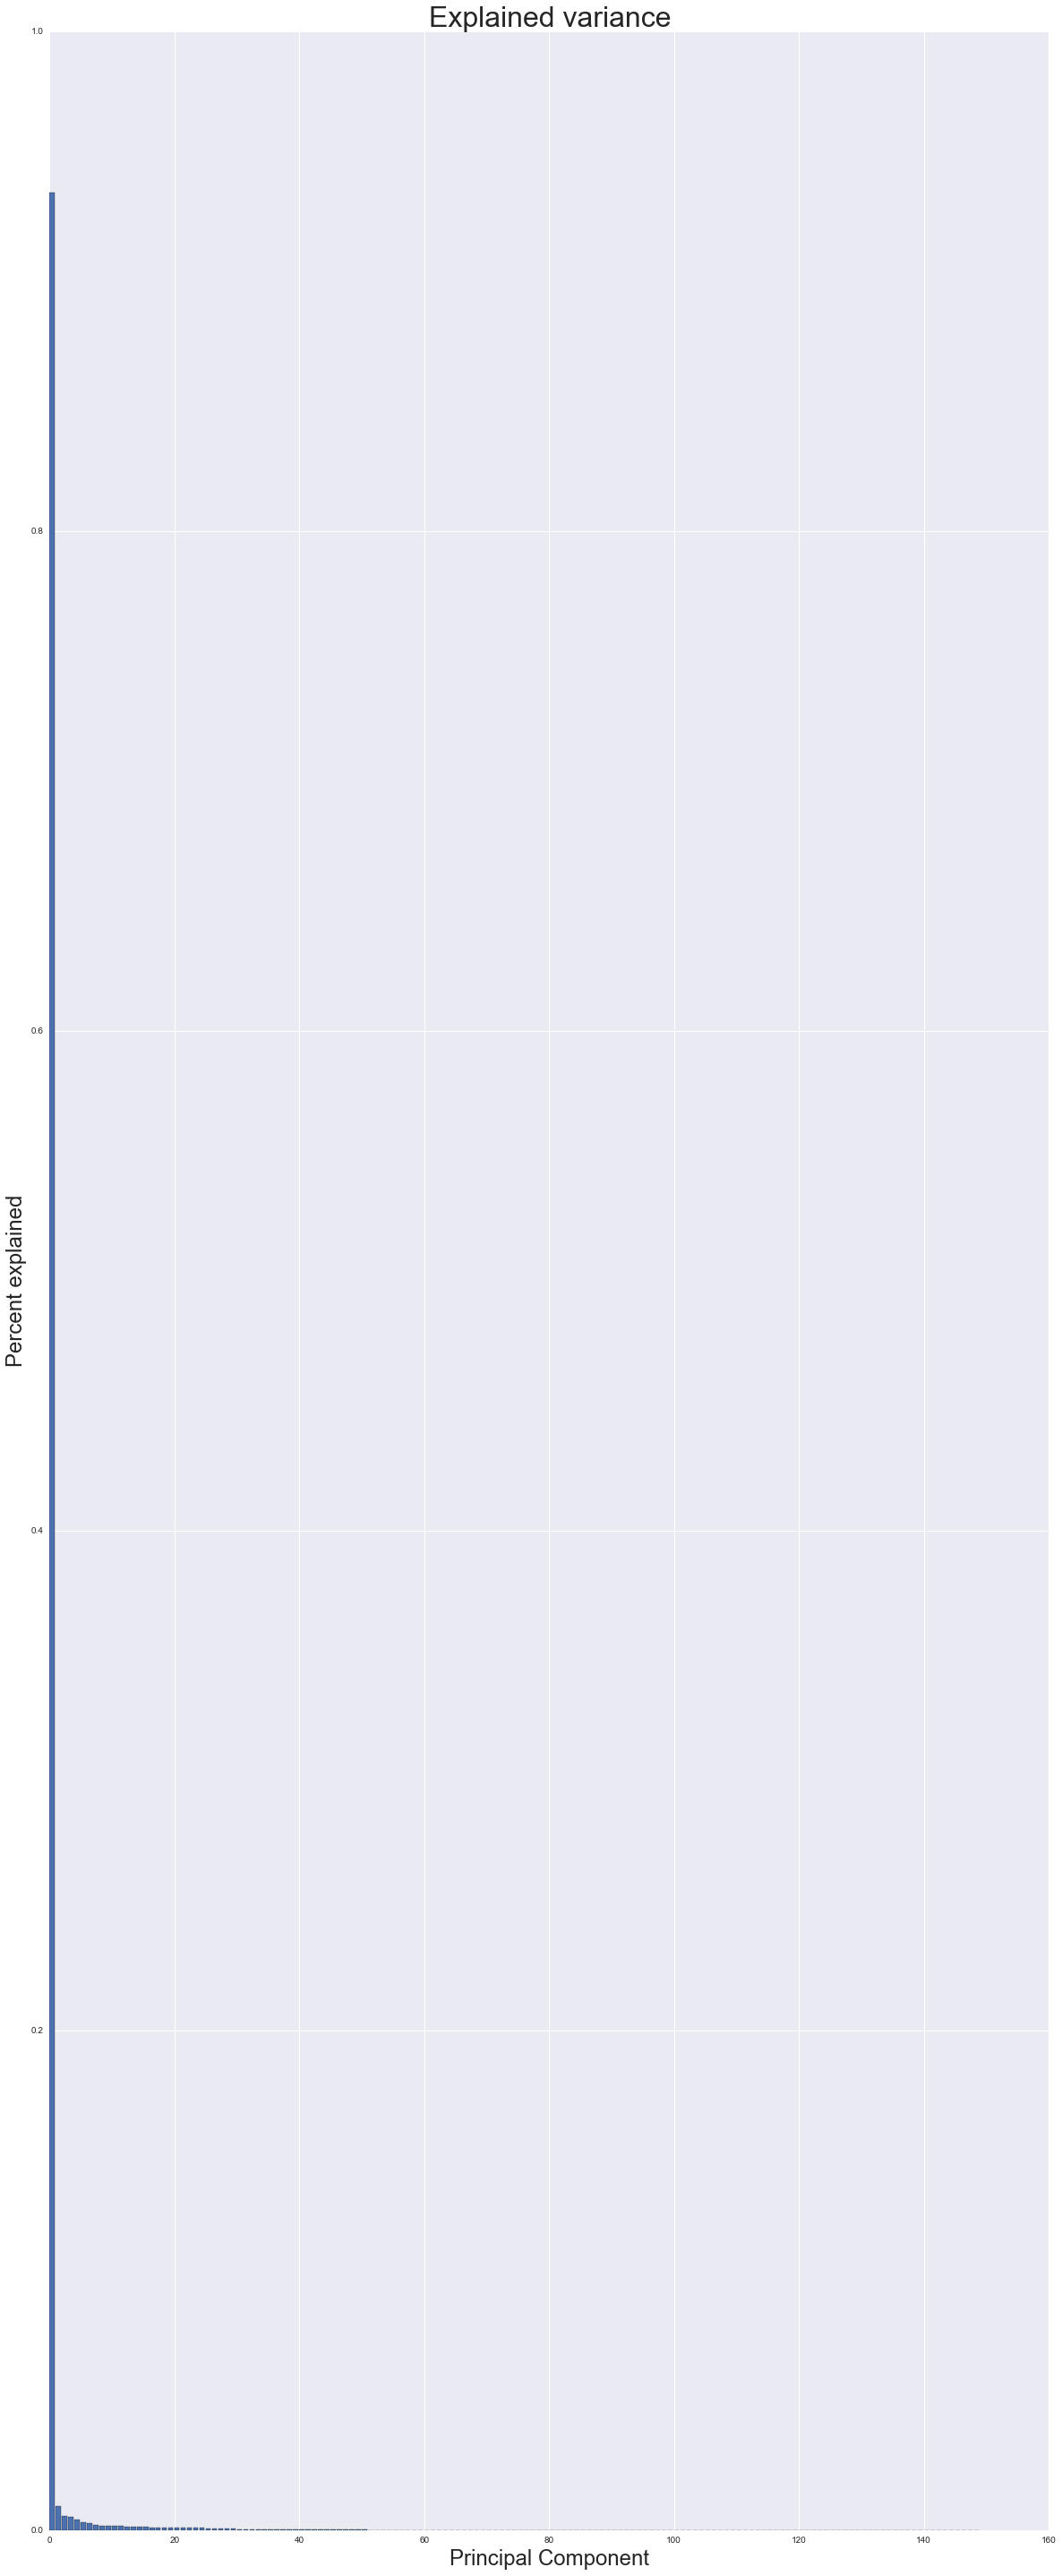

In [33]:
#Plot the explained variance for each component.
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
ax.set_title("Explained variance", size=32)
ax.set_ylabel("Percent explained", size=24)
ax.set_xlabel("Principal Component", size=24);

In [34]:
# Try PCA-generator again, this time for 7 components.
pca = PCA(n_components=7)

# Transform X_centered to X_pca via a fit_transform
X_pca = pca.fit_transform(X_centered)

# Transform X_train to X_train_pca
X_train_pca = pca.transform(X_train)

# Transform X_test to X_test_pca
X_test_pca = pca.transform(X_test)

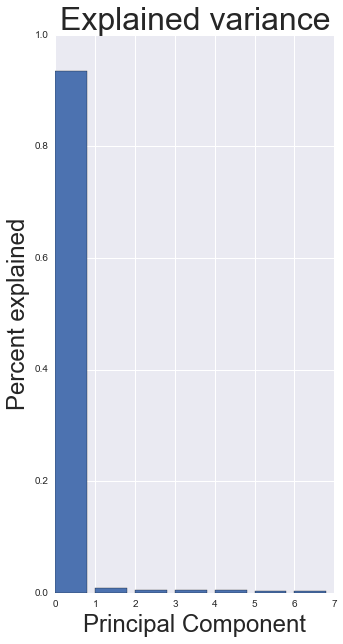

In [35]:
#Plot the explained variance for each component.
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
ax.set_title("Explained variance", size=32)
ax.set_ylabel("Percent explained", size=24)
ax.set_xlabel("Principal Component", size=24);

In [36]:
# See how reduced feature space runs through previously tested models.
# Note that we have to adjust max_features to account for fewer features.

# Decision Tree Classifier
clf1 = DecisionTreeClassifier(max_depth=4, min_samples_split=1,
       random_state=0)
clf1.fit(X_train_pca, y_train)
scores = cross_val_score(clf1, X, y)
print "DecisionTreeClassifier:", scores.mean()

# Boosted Decision Tree
clf2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=1, max_features=4,
       random_state=0))
clf2.fit(X_train_pca, y_train)
scores = cross_val_score(clf2, X, y)
print "AdaBoostClassifier:", scores.mean()

# Random Forest Classifier
clf3 = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=4,
     min_samples_split=1, random_state=0)
clf3.fit(X_train_pca, y_train)
scores = cross_val_score(clf3, X, y)
print "RandomForestClassifier:", scores.mean()

# Extra Trees Classifier
clf4 = ExtraTreesClassifier(n_estimators=10, max_depth=4,  max_features=4,
    min_samples_split=1, random_state=0)
clf4.fit(X_train_pca, y_train)
scores = cross_val_score(clf4, X, y)
print "ExtraTreesClassifier:  ", scores.mean()

DecisionTreeClassifier: 0.87553582892
AdaBoostClassifier: 0.871586486951
RandomForestClassifier: 0.593302756441
ExtraTreesClassifier:   0.628438768221


In [37]:
#Try K-NEAREST NEIGHBORS classifier on reduced feature space.
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.85079549500590301